___
# <font color= #d4b1e6> **Examen final: Precio kg Aguacate Hass** </font>
- <Strong> Nombre: </Strong>  <font color="blue">`Priscila Cervantes Ramírez` </font>
- <Strong> Materia: </Strong>  <font color="blue">`Modelos no lineales no lineales para pronósticos` </font>
___

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [2]:
data = pd.read_csv('aguacate.csv')
data.head()

,fecha,precio,mercado
0,01/01/2010,14.84,Mercado de Abastos de Guadalajara
1,01/02/2010,15.00,Mercado de Abastos de Guadalajara
2,01/03/2010,17.10,Mercado de Abastos de Guadalajara
3,01/04/2010,20.66,Mercado de Abastos de Guadalajara
4,01/05/2010,22.76,Mercado de Abastos de Guadalajara


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   fecha    191 non-null    object 
 1    precio  190 non-null    float64
 2   mercado  191 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.6+ KB


In [4]:
data.isna().sum()

fecha      0
 precio    1
mercado    0
dtype: int64

In [5]:
data.columns = data.columns.str.strip()


In [6]:
promedio = data["precio"].mean()

# Reemplazar valores faltantes
data["precio"] = data["precio"].fillna(promedio)

data.head()


,fecha,precio,mercado
0,01/01/2010,14.84,Mercado de Abastos de Guadalajara
1,01/02/2010,15.00,Mercado de Abastos de Guadalajara
2,01/03/2010,17.10,Mercado de Abastos de Guadalajara
3,01/04/2010,20.66,Mercado de Abastos de Guadalajara
4,01/05/2010,22.76,Mercado de Abastos de Guadalajara


In [7]:
data.isna().sum()

fecha      0
precio     0
mercado    0
dtype: int64

In [ ]:
data['fecha'] = pd.to_datetime(data['fecha'], dayfirst=True)
data = data.sort_values('fecha')
data = data.set_index('fecha')

# solo con la columna precio
serie = data['precio']

display(serie.head())

fecha
2010-01-01    14.84
2010-02-01    15.00
2010-03-01    17.10
2010-04-01    20.66
2010-05-01    22.76
Name: precio, dtype: float64

In [9]:
fig = px.line(serie, title="Precio del aguacate (2010–2025)")
fig.show()


<Figure size 1200x500 with 0 Axes>

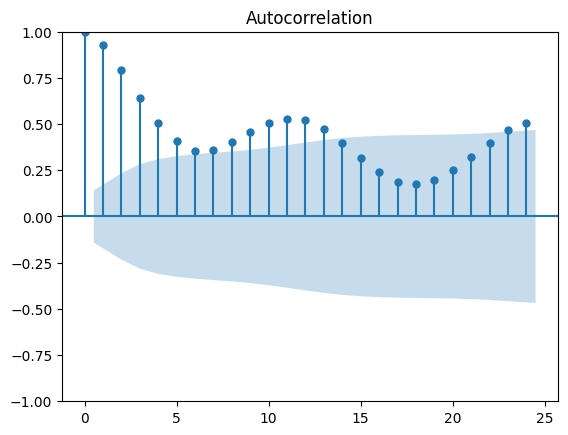

<Figure size 1200x500 with 0 Axes>

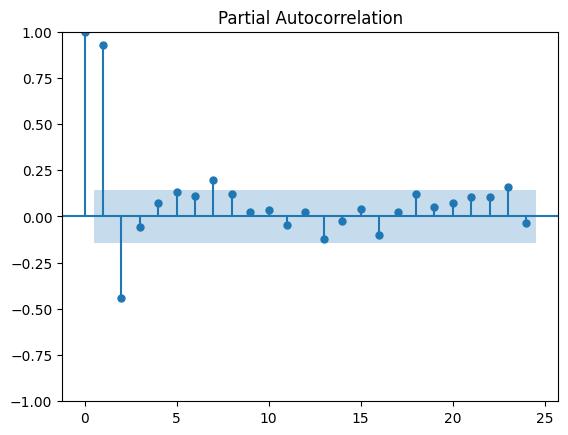

In [ ]:
plt.figure(figsize=(12,5))
plot_acf(serie, lags=24)
plt.show()

plt.figure(figsize=(12,5))
plot_pacf(serie, lags=24)
plt.show()


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
serie_scaled = scaler.fit_transform(serie.values.reshape(-1,1))


In [12]:
def crear_ventanas(data, ventana):
    X, y = [], []
    for i in range(len(data)-ventana):
        X.append(data[i:i+ventana])
        y.append(data[i+ventana])
    return np.array(X), np.array(y)

ventana = 12   # 12 meses
X, y = crear_ventanas(serie_scaled, ventana)

# entrenamiento
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

X_train.shape, X_test.shape


((143, 12, 1), (36, 12, 1))

In [13]:
model_lstm = Sequential([
    LSTM(64, return_sequences=True, activation='tanh', input_shape=(ventana,1)),
    Dropout(0.2),
    LSTM(32, return_sequences=False, activation='tanh'),
    Dense(16, activation='relu'),
    Dense(1)
])

model_lstm.compile(optimizer='RMSprop', loss='mse')

callback = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

hist = model_lstm.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    batch_size=16,
    callbacks=[callback],
    verbose=1
)

c:\Users\prisc\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - loss: 0.7207 - val_loss: 0.9954
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.6000 - val_loss: 0.8326
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.5446 - val_loss: 0.7289
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.5182 - val_loss: 0.6990
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.4986 - val_loss: 0.7021
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.4902 - val_loss: 0.6987
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.4882 - val_loss: 0.7172
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.4825 - val_loss: 0.6970
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.4660 - val_loss: 0.6706
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.4561 - val_loss: 0.6613
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.4453 - val_loss: 0.6471
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.4338 - val_l

In [14]:
model_sarima = SARIMAX(
    serie,
    order=(2,1,2),
    seasonal_order=(1,1,1,12)
)

sarima_fit = model_sarima.fit()
print(sarima_fit.summary())



c:\Users\prisc\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\prisc\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                                      SARIMAX Results                                       
Dep. Variable:                               precio   No. Observations:                  191
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -534.901
Date:                              Wed, 26 Nov 2025   AIC                           1083.803
Time:                                      16:28:03   BIC                           1106.075
Sample:                                  01-01-2010   HQIC                          1092.835
                                       - 11-01-2025                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3085      0.266      4.916      0.000       0.787       1.830
ar.L2         -0.44

In [15]:
#pred sarima
n_test = len(y_test)

# pronósticos con test
pred_sarima = sarima_fit.forecast(steps=n_test)

# dejarlo en 1D
pred_sarima = np.array(pred_sarima).flatten()




In [16]:
pred_lstm = model_lstm.predict(X_test)
pred_lstm = scaler.inverse_transform(pred_lstm)
y_test_inv = scaler.inverse_transform(y_test)

mae_lstm = mean_absolute_error(y_test_inv, pred_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, pred_lstm))
mape_lstm = np.mean(np.abs((y_test_inv - pred_lstm) / y_test_inv)) * 100

print("LSTM RMSE:", rmse_lstm)
print("LSTM MAE:", mae_lstm)
print("LSTM MAPE:", mape_lstm)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step
LSTM RMSE: 5.624642930708269
LSTM MAE: 4.247571137746176
LSTM MAPE: 8.519379048620172


In [17]:
real = y_test_inv.flatten()

rmse_sarima = np.sqrt(mean_squared_error(real, pred_sarima))
mae_sarima = mean_absolute_error(real, pred_sarima) ** 0.5
mape_sarima = np.mean(np.abs((real - pred_sarima) / real)) * 100

print("SARIMA RMSE:", rmse_sarima)
print("SARIMA MAE:", mae_sarima)
print("SARIMA MAPE:", mape_sarima)


SARIMA RMSE: 10.83826090443759
SARIMA MAE: 2.9103769797355086
SARIMA MAPE: 19.078678655799994


In [ ]:
df_plot = pd.DataFrame({
    "Fecha": serie.index,              # TODAS LAS FECHAS
    "Real": serie.values               # TODA LA SERIE REAL
})

# Agregar solo la parte del test con la predicción lstm
df_pred = pd.DataFrame({
    "Fecha": serie.index[-len(pred_lstm):],
    "LSTM": pred_lstm.flatten()
})

# Unir ambos
df_full = df_plot.merge(df_pred, on="Fecha", how="left")

fig = px.line(df_full, x="Fecha", y=["Real", "LSTM"],
              title="Serie Completa: Real vs Predicción LSTM")
fig.show()



In [ ]:
# DataFrame completo con toda la serie real
df_plot = pd.DataFrame({
    "Fecha": serie.index,     
    "Real": serie.values      
})

fechas_test = serie.index[-len(pred_sarima):]

df_pred_sarima = pd.DataFrame({
    "Fecha": fechas_test,
    "ARIMA": pred_sarima
})

df_full_sarima = df_plot.merge(df_pred_sarima, on="Fecha", how="left")

# Gráfica
fig = px.line(df_full_sarima, x="Fecha", y=["Real", "ARIMA"],
              title="Serie Completa: Real vs Predicción SARIMA")
fig.show()



In [20]:
future = serie_scaled[-ventana:].reshape(1, ventana, 1)
predicciones = []

for i in range(12):  # 12 meses futuros
    p = model_lstm.predict(future)[0]
    predicciones.append(p)
    future = np.append(future[:,1:,:], [[p]], axis=1)

pred_inv = scaler.inverse_transform(predicciones).flatten()
pred_inv


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


array([38.42910328, 39.99376673, 42.23197289, 44.50326806, 46.43741261,
       47.75213197, 48.42752467, 48.48980405, 47.99899328, 47.30017825,
       46.682071  , 46.38145747])

In [ ]:
# pronósticos con 6 meses de ambos modelos

future_steps = 6  # dic 2025 a mayo 2026

last_date = data.index[-1]  

future_dates = pd.date_range(
    start=last_date + pd.DateOffset(months=1),
    periods=future_steps,
    freq="MS"
)

#sarima
future_pred_sarima = sarima_fit.forecast(steps=future_steps)
future_pred_sarima = np.array(future_pred_sarima).flatten()

df_future_sarima = pd.DataFrame({
    "fecha": future_dates,
    "prediccion_SARIMA": future_pred_sarima
})

print("\n===== PRONÓSTICO FUTURO SARIMA =====")
display(df_future_sarima)

# lstm
future_lstm_input = serie_scaled[-ventana:].reshape(1, ventana, 1)
preds_lstm = []

for _ in range(future_steps):
    pred = model_lstm.predict(future_lstm_input)[0]
    preds_lstm.append(pred)
    future_lstm_input = np.append(future_lstm_input[:,1:,:], [[pred]], axis=1)

future_pred_lstm = scaler.inverse_transform(preds_lstm).flatten()

df_future_lstm = pd.DataFrame({
    "fecha": future_dates,
    "prediccion_LSTM": future_pred_lstm
})

print("\n===== PRONÓSTICO FUTURO LSTM =====")
display(df_future_lstm)

# gráfica de ambas
df_comparacion = pd.DataFrame({
    "fecha": future_dates,
    "ARIMA": future_pred_sarima,
    "LSTM": future_pred_lstm
})

fig = px.line(
    df_comparacion,
    x="fecha",
    y=["SARIMA", "LSTM"],
    title="Pronóstico Futuro (Dic 2025 → May 2026): SARIMA vs LSTM",
    markers=True
)

fig.show()



===== PRONÓSTICO FUTURO SARIMA =====


,fecha,prediccion_SARIMA
0,2025-12-01,37.275863
1,2026-01-01,43.175501
2,2026-02-01,44.388030
3,2026-03-01,49.661560
4,2026-04-01,57.150939
5,2026-05-01,63.395280


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step

===== PRONÓSTICO FUTURO LSTM =====


,fecha,prediccion_LSTM
0,2025-12-01,38.429103
1,2026-01-01,39.993767
2,2026-02-01,42.231973
3,2026-03-01,44.503268
4,2026-04-01,46.437413
5,2026-05-01,47.752132


In [ ]:
# real vs lstm y sarima

df_comparacion_test = pd.DataFrame({
    "Fecha": fechas_test,
    "Real": real,
    "Pred_LSTM": pred_lstm.flatten(),
    "Pred_SARIMA": pred_sarima
})

print("\n===== COMPARACIÓN REAL vs LSTM vs SARIMA =====")
display(df_comparacion_test)



===== COMPARACIÓN REAL vs LSTM vs SARIMA =====


,Fecha,Real,Pred_LSTM,Pred_SARIMA
0,2022-12-01,40.00,42.096100,37.275863
1,2023-01-01,37.73,44.477413,43.175501
2,2023-02-01,35.00,43.204998,44.388030
3,2023-03-01,38.20,39.507671,49.661560
4,2023-04-01,43.77,39.976727,57.150939
5,2023-05-01,46.85,44.724407,63.395280
6,2023-06-01,51.11,48.493587,68.835660
7,2023-07-01,68.13,52.413452,71.775556
8,2023-08-01,68.11,67.022766,67.201432
9,2023-09-01,62.54,67.505585,63.444512
